## Part 1

1 Write a regex to extract all the numbers with orange color background from the below text in italics.

In [139]:
import pandas as pd
import numpy as np

In [140]:
data={"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}
data

{'errors': [{'code': 3,
   'message': '[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)'}],
 'orders': [{'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6},
  {'id': 7},
  {'id': 8},
  {'id': 9},
  {'id': 10},
  {'id': 11},
  {'id': 648},
  {'id': 649},
  {'id': 650},
  {'id': 651},
  {'id': 652},
  {'id': 653}]}

In [141]:
x = pd.json_normalize(data['orders'])['id'].tolist()
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 648, 649, 650, 651, 652, 653]

In [142]:
y=pd.json_normalize(data['errors'])['code'].tolist()
y

[3]

In [143]:
z=x+y
z

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 648, 649, 650, 651, 652, 653, 3]

2 Problem statement - There are times when a user writes Good, Nice App or any other positive text, in the review and gives 1-star rating. Your goal is to identify the reviews where the semantics of review text does not match rating. 


In [144]:
import re
import string

In [145]:
data1 = pd.read_csv('/content/chrome_reviews.csv')
data1.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [146]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7204 non-null   int64 
 1   Review URL       7204 non-null   object
 2   Text             7203 non-null   object
 3   Star             7204 non-null   int64 
 4   Thumbs Up        7204 non-null   int64 
 5   User Name        7204 non-null   object
 6   Developer Reply  95 non-null     object
 7   Version          7119 non-null   object
 8   Review Date      7204 non-null   object
 9   App ID           7204 non-null   object
dtypes: int64(3), object(7)
memory usage: 562.9+ KB


In [147]:
df = data1[['Text', 'Star']]
df.iloc[30]

Text    Data consuming
Star                 1
Name: 30, dtype: object

ref: https://pypi.org/project/textblob/
TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis.

In [148]:
df

,Text,Star
0,This is very helpfull aap.,5
1,Good,3
2,Not able to update. Neither able to uninstall.,1
3,Nice app,4
4,Many unwanted ads,1
...,...,...
7199,Bagusss..,5
7200,Bad version 😔,1
7201,One thing that I have to say I can't spelled t...,5
7202,Excellent,5


In [149]:
from textblob import TextBlob
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [150]:

df = df[df.Star != 5]
df = df[df.Star != 4]
df = df[df.Star != 3]
df.head()

,Text,Star
2,Not able to update. Neither able to uninstall.,1
4,Many unwanted ads,1
8,Very bad app 😞,1
9,Many times I tried to update its not updating....,1
12,App is not getting update and it is not gettin...,1


In [151]:
senti_list = []
for i in df["Text"]:
   
    if ( TextBlob(i).sentiment[0] > 0):
        senti_list.append('Positive')
    elif ( TextBlob(i).sentiment[0] < 0):
        senti_list.append('Negative')
    else:
        senti_list.append('Neutral') 

In [152]:
df["sentiment"]=senti_list
df.head(20)

,Text,Star,sentiment
2,Not able to update. Neither able to uninstall.,1,Positive
4,Many unwanted ads,1,Positive
8,Very bad app 😞,1,Negative
9,Many times I tried to update its not updating....,1,Positive
12,App is not getting update and it is not gettin...,1,Positive
15,Very coming in real status. Thank you,1,Positive
19,I want to download greana free fire but that n...,1,Positive
30,Data consuming,1,Neutral
31,My phone is samsung s9 and I can't update the app,1,Neutral
32,"It lags this days. Worst of it, I can't even u...",1,Negative


In [153]:
check_attention = df[(df["sentiment"] == "Positive") & (df["Star"] < 2)]

In [154]:
check_attention.head(10)

,Text,Star,sentiment
2,Not able to update. Neither able to uninstall.,1,Positive
4,Many unwanted ads,1,Positive
9,Many times I tried to update its not updating....,1,Positive
12,App is not getting update and it is not gettin...,1,Positive
15,Very coming in real status. Thank you,1,Positive
19,I want to download greana free fire but that n...,1,Positive
42,Okk kind but bad then brave,1,Positive
48,Unable to update won't load crashing at times ...,1,Positive
59,Don't know why chrome started controlling the ...,1,Positive
87,Chrome is crashing again and again...Can't ope...,1,Positive


3 Ranking Data - Understanding the co-relation between keyword rankings with description or any other attribute

In [155]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


In [156]:
data2=pd.read_csv('/content/browser_rankings_data.csv',skiprows=1)
data2.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [157]:
data2.shape

(3066, 10)

In [158]:
data2.isnull().sum()

ID                                  0
Keyword                             0
Rank                               16
Country                             0
Language                            0
Date                                0
App ID                              0
Date of Last Description Change     0
Short Description                   0
Long Description                    0
dtype: int64

In [159]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               3066 non-null   int64  
 1   Keyword                          3066 non-null   object 
 2   Rank                             3050 non-null   float64
 3   Country                          3066 non-null   object 
 4   Language                         3066 non-null   object 
 5   Date                             3066 non-null   object 
 6   App ID                           3066 non-null   object 
 7   Date of Last Description Change  3066 non-null   object 
 8   Short Description                3066 non-null   object 
 9   Long Description                 3066 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 239.7+ KB


In [160]:
data2['Date']=data2['Date'].astype('datetime64')
data2['Date of Last Description Change']=data2['Date of Last Description Change'].astype('datetime64')


In [161]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ID                               3066 non-null   int64         
 1   Keyword                          3066 non-null   object        
 2   Rank                             3050 non-null   float64       
 3   Country                          3066 non-null   object        
 4   Language                         3066 non-null   object        
 5   Date                             3066 non-null   datetime64[ns]
 6   App ID                           3066 non-null   object        
 7   Date of Last Description Change  3066 non-null   datetime64[ns]
 8   Short Description                3066 non-null   object        
 9   Long Description                 3066 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory

In [162]:
# impute_missing_values using KNNImputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', missing_values=np.nan)
data2['Rank'] = imputer.fit_transform(data2[['Rank']])

In [163]:
data2.isnull().sum()

ID                                 0
Keyword                            0
Rank                               0
Country                            0
Language                           0
Date                               0
App ID                             0
Date of Last Description Change    0
Short Description                  0
Long Description                   0
dtype: int64

In [164]:
le=LabelEncoder

In [165]:
data2['Keyword']= le.fit_transform(data2['Keyword'],data2['Keyword'])
data2['Rank']= le.fit_transform(data2['Rank'],data2['Rank'])
data2['Country']= le.fit_transform(data2['Country'],data2['Country'])
data2['Language']= le.fit_transform(data2['Language'],data2['Language'])
data2['Date']= le.fit_transform(data2['Date'],data2['Date'])
data2['App ID']= le.fit_transform(data2['App ID'],data2['App ID'])
data2['Date of Last Description Change']= le.fit_transform(data2['Date of Last Description Change'],data2['Date of Last Description Change'])
data2['Short Description']= le.fit_transform(data2['Short Description'],data2['Short Description'])
data2['Long Description']= le.fit_transform(data2['Long Description'],data2['Long Description'])

In [166]:
data2.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,3,1,0,0,0,7,0,8,2
1,2,3,2,0,0,0,0,0,3,1
2,3,3,3,0,0,0,4,5,2,0
3,3,3,3,0,0,0,4,0,2,3
4,4,3,0,0,0,0,2,3,6,9


In [172]:
#in the above data the value of country and language is only one unique value so we we drop the these two column
data2 = data2.drop(columns=['Country','Language'], axis=1)
data2.head()

,ID,Keyword,Rank,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,3,1,0,7,0,8,2
1,2,3,2,0,0,0,3,1
2,3,3,3,0,4,5,2,0
3,3,3,3,0,4,0,2,3
4,4,3,0,0,2,3,6,9


In [173]:
#now we going to find correlation between all the features
print(data2.corr())

                                       ID   Keyword      Rank      Date  \
ID                               1.000000  0.001623  0.009047  0.994586   
Keyword                          0.001623  1.000000  0.104252  0.008103   
Rank                             0.009047  0.104252  1.000000  0.016383   
Date                             0.994586  0.008103  0.016383  1.000000   
App ID                           0.000907  0.067906  0.528474  0.004300   
Date of Last Description Change -0.000803 -0.060054 -0.239717 -0.003803   
Short Description               -0.002761 -0.206424 -0.223220 -0.013071   
Long Description                 0.002429  0.181591  0.338086  0.011499   

                                   App ID  Date of Last Description Change  \
ID                               0.000907                        -0.000803   
Keyword                          0.067906                        -0.060054   
Rank                             0.528474                        -0.239717   
Date        

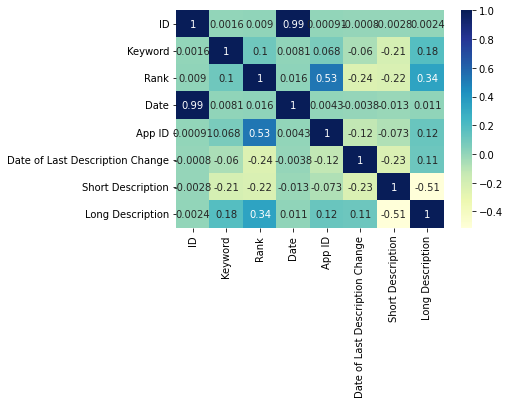

In [174]:
# plotting correlation heatmap
dataplot = sns.heatmap(data2.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

#Suggested questions:

1.Is there any co-relation between short description, long description and ranking? Does the placement of keyword (for example - using a keyword in the first 10 words - have any co-relation with the ranking)?


Ans:- In between short des and long des there are correlation between then but short des and renk is little less correlation between then in long des and rank between then there are correlation between of 0.34.                   Rank & Keyword are weak monotoncally negatively correlated, using a keyword in the first 10 words would not have a significantly major monotonically correlation with Rank, however it will impact somewhat negatively correlated


2.Does APP ID (Also known as package name) play any role in ranking? 

Ans:-Comparing to all features 'APP ID' is highly correlated to 'Ranking', according to Spearman rank correlation coefficient it has 'Weak monotonically increasing relationship' which proves that if either of variable increases then other will increse as well. 'APP ID' plays an important part in deciding ranking

3.Any other pattern or good questions that you can think of and answer?

Ans:-These are the most negatively correlated features, this may be becuase of these are sentiment based.